<a href="https://colab.research.google.com/github/rahulbhaskarini/FakeNewsDetection/blob/main/FakeNewsDetectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
nltk.download('words')
nltk.download("stopwords")





[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FakeNewsDetection/train.csv')

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Data Preprocessing

In [ ]:
def preprocess(df):
    try:
        #Drop unnecessary columns      
        df = df.drop(columns=['id','author','title'],axis=1)
        
        #Drop null values
        df = df.dropna(axis=0)
        
        #converting to lower letters
        df['clean_news'] = df['text'].str.lower()
        
        #replacing characters which are not alphabet letters, digits, single spaces with an empty space
        df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]','')
        
        #Replacing new line character with an empty space
        df['clean_news'] = df['clean_news'].str.replace('\n','')
        
        #Replace multiple spaces with single space
        df['clean_news'] = df['clean_news'].str.replace('\s+',' ')
        
        #removing stopwords
        stop = stopwords.words('english')
        df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

        return df
        
    except:
        return "error"
    return df

In [ ]:
%%time
#preprocess function
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FakeNewsDetection/train.csv')
df = preprocess(df)
df

CPU times: user 45 s, sys: 485 ms, total: 45.5 s
Wall time: 46.8 s


,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october 29 2016 tension ...
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...
...,...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0,rapper unloaded black celebrities met donald t...
20796,When the Green Bay Packers lost to the Washing...,0,green bay packers lost washington redskins wee...
20797,The Macy’s of today grew from the union of sev...,0,macys today grew union several great names ame...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercises balkans 11...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        20761 non-null  object
 1   label       20761 non-null  int64 
 2   clean_news  20761 non-null  object
dtypes: int64(1), object(2)
memory usage: 648.8+ KB


# Exploratory Data Analysis

In [ ]:
from wordcloud import WordCloud

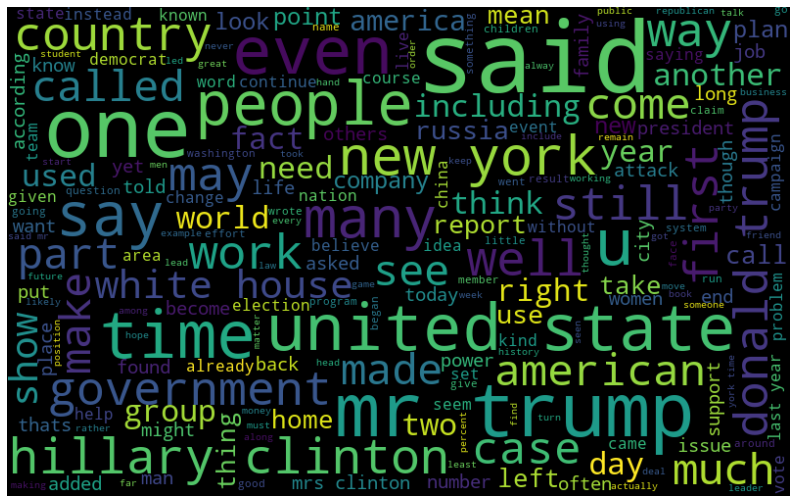

CPU times: user 1min 8s, sys: 3.15 s, total: 1min 12s
Wall time: 1min 13s


In [ ]:
%%time
#visualize the frequent words
all_words = " ".join([sentence for sentence in df["clean_news"]])

wordCloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

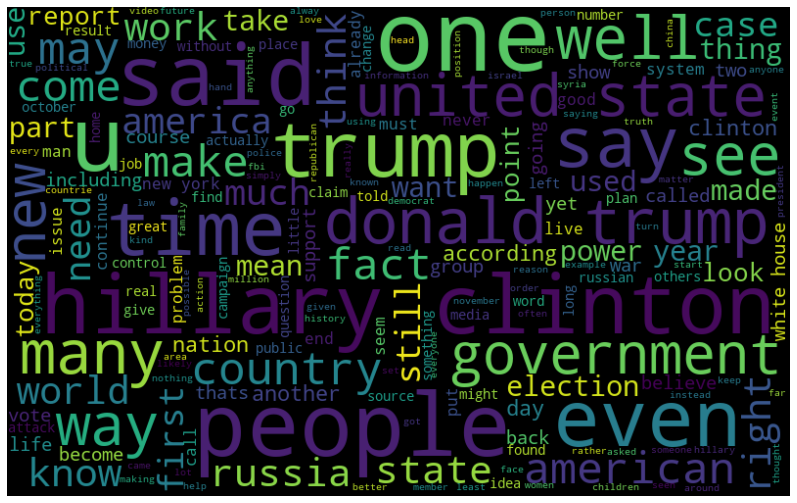

CPU times: user 28.9 s, sys: 884 ms, total: 29.8 s
Wall time: 29.8 s


In [ ]:
%%time
#visualize the frequent words for genuine news
all_words = " ".join([sentence for sentence in df["clean_news"][df['label']==1]])

wordCloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

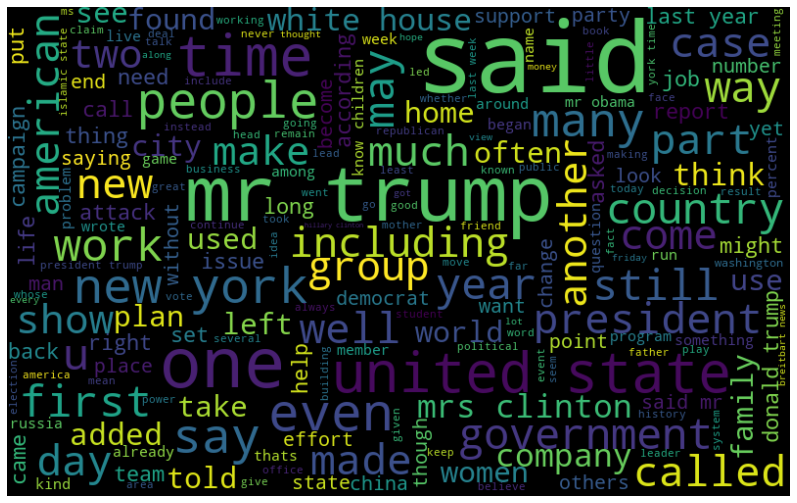

CPU times: user 42.8 s, sys: 1.15 s, total: 44 s
Wall time: 44 s


In [ ]:
%%time
#visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in df["clean_news"][df['label']==0]])

wordCloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Create Word Embeddings


In [ ]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm

In [ ]:
%%time
#tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

CPU times: total: 5.83 s
Wall time: 5.83 s


199536

In [ ]:
# padding data
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500,padding='post',truncating='post')

In [ ]:
%%time
#create embedding index
embedding_index = {}
with open('glove.6B.100d.txt',"r",encoding='utf-8') as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:],dtype='float32')
        #print(values,word,coefs,sep='\n')
        embedding_index[word] = coefs
        #print(len(coefs))
        #print(word)
        

400000it [00:10, 37419.01it/s]

CPU times: total: 10.8 s
Wall time: 10.8 s


In [ ]:
embedding_dim = 100 #since we are using 100-D glove vectors
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word,i in tqdm(word_index.items()):
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████████████████████████████████████████████████████████████████| 199536/199536 [00:00<00:00, 767972.24it/s]


In [ ]:
len(embedding_matrix[1])

100

# Input Split

In [ ]:
padded_seq[1]

array([   258,     28,   1557,     92,   4913,  27340,    415,   2246,
         2067,    377,    532,   1558,   5339,     29,     12,    796,
          179,    361,   1917,  17459,    829,  20147,   2990,   2626,
          640,    747,    252,   2025,   3113,  10995,    125,     39,
         2086,  78618,   3022,   3646,   3561,   3113,    835,    153,
         3458,     29,   9775,  51963,   3724,     18,    218,     20,
         3234,  20147,  10024,    625,     11,    481,   2494,   2417,
         8173,    442,    701,    613,    147,     14,  22280,    902,
          324,      8,    164,   3712,     60,  11541,    867,   2644,
           16,    864,   4422,    176,   5305,   2086,   4253,     40,
          257,    835,    192,     10,   2403,     10,   2086,   9775,
           58,   8372,  11246, 104297,  20952,   3713,  20953,  78619,
       104298,   5459,  31169,  25044,   7998,  19120,  65806,   4403,
          168,    261,  25045,   4403,    162,    355,    904,   1581,
      

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(padded_seq,df['label'],test_size=0.2,random_state=42,stratify=df['label'])

In [ ]:
len(x_train[0])

500

## Model Training

In [ ]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dropout(0.2),
    Dense(512),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [ ]:
print(len(embedding_matrix))

199536


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 100)         19953600  
                                                                 
 dropout_30 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_20 (LSTM)              (None, None, 128)         117248    
                                                                 
 lstm_21 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               66048     
                                                                 
 dropout_32 (Dropout)        (None, 512)             

In [ ]:
#Train the model
history = model.fit(x_train,y_train,epochs=10, batch_size=128, validation_data=[x_test,y_test])

Epoch 1/10
130/130 [==============================] - ETA: 0s - loss: 0.6204 - accuracy: 0.6499

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_11/embedding_11/embedding_lookup' defined at (most recent call last):
    File "F:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "F:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "F:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "F:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "F:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "F:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "F:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "F:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "F:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "F:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "F:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "F:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "F:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_10576\3171641752.py", line 2, in <cell line: 2>
      history = model.fit(x_train,y_train,epochs=10, batch_size=128, validation_data=[x_test,y_test])
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1445, in fit
      val_logs = self.evaluate(
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1499, in test_step
      y_pred = self(x, training=False)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "F:\ProgramData\Anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 199, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_11/embedding_11/embedding_lookup'
indices[17,37] = 199536 is not in [0, 199536)
	 [[{{node sequential_11/embedding_11/embedding_lookup}}]] [Op:__inference_test_function_8649]